In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import tqdm

In [ ]:
base_path = '../data/manifest-1746130313947/Duke-Breast-Cancer-MRI'

lens = []
shapes = []

for patient_folder in tqdm.tqdm(sorted(os.listdir(base_path))):
    # patient dir
    patient_path = os.path.join(base_path, patient_folder)
    if not os.path.isdir(patient_path): continue
    assert len(os.listdir(patient_path)) == 1
    patient_path = os.path.join(patient_path, os.listdir(patient_path)[0])
    
    # t1 dir
    t1_dir = [d for d in os.listdir(patient_path) if 't1' in d.lower()]
    if not t1_dir:
        print(f'No T1 directory found for {patient_folder}')
        continue
    assert len(t1_dir) == 1
    t1_dir = os.path.join(patient_path, t1_dir[0])
    lens.append(len(os.listdir(t1_dir)))

    # dcm files
    for i, file in enumerate(sorted(os.listdir(t1_dir))):
        dcm_file = pydicom.dcmread(os.path.join(t1_dir, file))
        image = dcm_file.pixel_array
        assert len(image.shape) == 2 # assert 2d images
        assert image.shape[0] == image.shape[1] # assert square images
        if i == 0:
            shape = image.shape
        else:
            assert image.shape == shape # assert all slices have same shape

    shapes.append(shape)

  0%|          | 0/293 [00:00<?, ?it/s]

 63%|██████▎   | 184/293 [00:29<00:13,  8.27it/s]

No T1 directory found for Breast_MRI_552


 83%|████████▎ | 242/293 [00:39<00:05,  8.84it/s]

No T1 directory found for Breast_MRI_735


100%|██████████| 293/293 [00:46<00:00,  6.32it/s]


In [49]:
from collections import Counter
Counter(shapes), Counter(lens)

(Counter({(512, 512): 156,
          (256, 256): 56,
          (320, 320): 42,
          (448, 448): 24,
          (384, 384): 12}),
 Counter({60: 45,
          62: 18,
          58: 15,
          208: 15,
          64: 15,
          56: 15,
          50: 14,
          54: 11,
          66: 10,
          55: 10,
          70: 9,
          65: 9,
          68: 6,
          63: 6,
          52: 5,
          224: 5,
          42: 4,
          40: 4,
          53: 4,
          80: 4,
          72: 4,
          256: 3,
          75: 3,
          44: 3,
          77: 3,
          73: 3,
          51: 3,
          36: 2,
          38: 2,
          100: 2,
          57: 2,
          37: 2,
          86: 2,
          192: 2,
          48: 2,
          59: 2,
          69: 2,
          120: 1,
          35: 1,
          88: 1,
          47: 1,
          45: 1,
          92: 1,
          91: 1,
          105: 1,
          99: 1,
          110: 1,
          112: 1,
          71: 1,
          61: 1

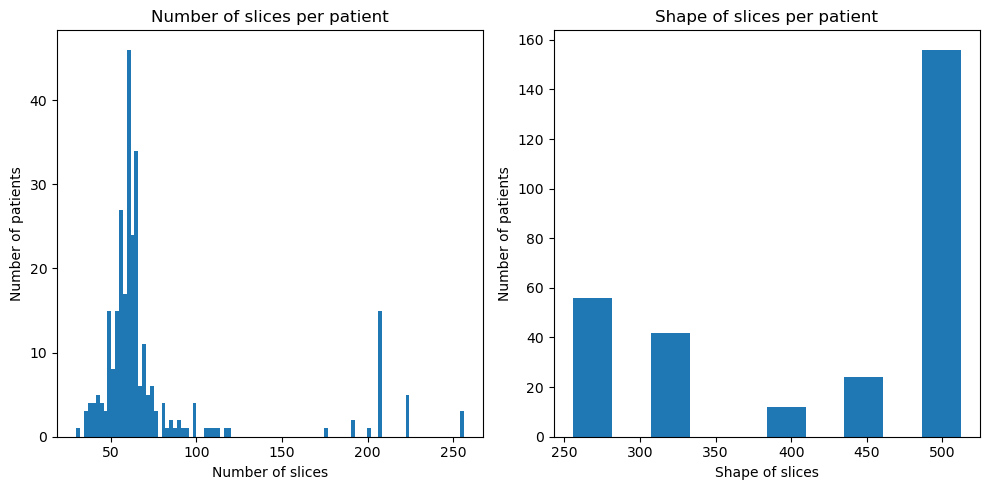

In [60]:
# bar plot of lens and shapes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(lens, bins=100)
plt.title('Number of slices per patient')
plt.xlabel('Number of slices')
plt.ylabel('Number of patients')
plt.subplot(1, 2, 2)
plt.hist([i[0] for i in shapes])
plt.title('Shape of slices per patient')
plt.xlabel('Shape of slices')
plt.ylabel('Number of patients')
plt.tight_layout()
plt.show()